In [1]:
import torch
import weightwatcher as ww

In [2]:
print(ww.__version__)

0.4.9


In [3]:
import matplotlib.pyplot as plt

In [4]:
class LinearLayer(torch.nn.Module):
    
    def __init__(self, inputSize=512, outputSize=2048):
        super(LinearLayer, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [6]:
linear_layer = LinearLayer()

In [7]:
def weights_init(m):
    if isinstance(m, torch.nn.Linear):
        #torch.nn.init.xavier_uniform(m.weight.data)
        torch.nn.init.xavier_normal(m.weight.data)

linear_layer.apply(weights_init)

<ipython-input-7-b1f0a7e35139>:4: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  torch.nn.init.xavier_normal(m.weight.data)


LinearLayer(
  (linear): Linear(in_features=512, out_features=2048, bias=True)
)

INFO:weightwatcher:

python      version 3.8.3 (default, Jul  2 2020, 16:21:59) 
[GCC 7.3.0]
numpy       version 1.18.5
tensforflow version 2.3.1
keras       version 2.4.0
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savefig': False, 'rescale': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'savefolder': None, 'min_evals': 0, 'max_evals': None, 'plot': True, 'mp_fit': True, 'layers': []}
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savefig': False, 'rescale': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'savefolder': None, 'min_evals': 0, 'max_evals': None, 'plot': True, 'mp_fit': True, 'layers': []}
INFO:weightwatcher:LAYER: 1 4  : <class 'torch.nn.modules.linear.Linear'>
/home/eecs/yyaoqing/anaconda3/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning:

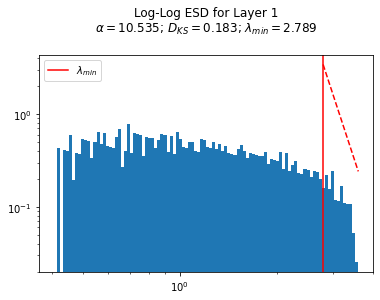

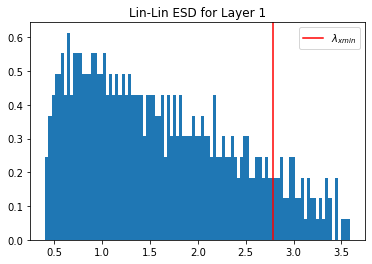

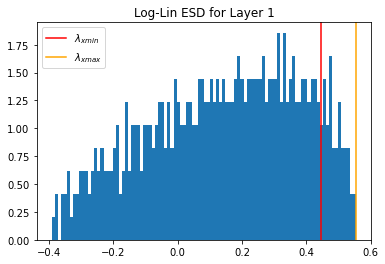

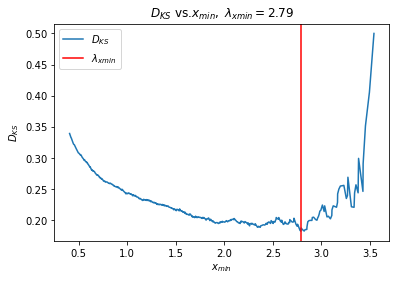

INFO:weightwatcher:MP Fitting Layer: 1 None 
INFO:weightwatcher:MP fit min_esd=0.41, max_esd=3.59, Q=4.0, s1=1.00 Wsc ale=1.00
/scratch/yyaoqing/WeightWatcher/weightwatcher/RMT_Util.py:82: RuntimeWarning: divide by zero encountered in true_divide
  return x, (1 / (2 * np.pi * sigma * sigma * x * y)) * np.sqrt((b - x) * (x - a))
/scratch/yyaoqing/WeightWatcher/weightwatcher/RMT_Util.py:82: RuntimeWarning: invalid value encountered in sqrt
  return x, (1 / (2 * np.pi * sigma * sigma * x * y)) * np.sqrt((b - x) * (x - a))


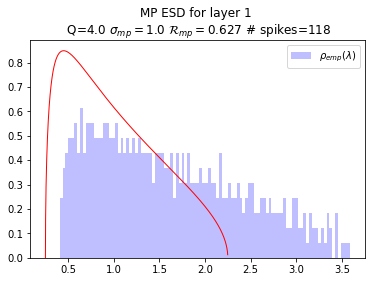

,layer_id,name,D,M,N,W_scale,alpha,alpha_weighted,best_fit,bulk_max,...,num_spikes,rank_loss,rf,sigma,sigma_mp,spectral_norm,stable_rank,sv_max,xmax,xmin
0,1,None,0.182563,512.0,2048.0,1.0,10.535014,5.845176,lognormal,2.25,...,118.0,0.0,1.0,1.309735,1.0,3.587842,228.284737,1.89416,3.587842,2.789123


<Figure size 432x288 with 0 Axes>

In [9]:
linear_layer.load_state_dict(torch.load('linear_layer.ckpt'))
watcher = ww.WeightWatcher(model=linear_layer)
watcher.analyze(mp_fit=True, plot=True, rescale=False)

In [58]:
x = linear_layer.linear.weight.data.flatten().numpy()

Text(0.5, 1.0, 'Density plot of weight elements')

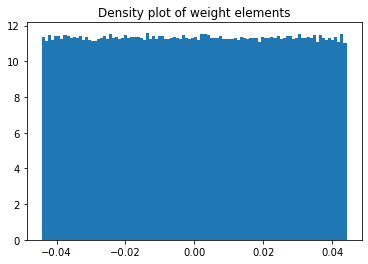

In [64]:
plt.hist(x, bins=100, density=True)
plt.title('Density plot of weight elements')

In [49]:
ESD = watcher.get_ESD()

INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savefig': False, 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'savefolder': None, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': []}
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savefig': False, 'rescale': True, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'savefolder': None, 'min_evals': 0, 'max_evals': None, 'plot': False, 'mp_fit': False, 'layers': []}
INFO:weightwatcher:Getting ESD for layer None 
INFO:weightwatcher:Found 512 eiganvalues for 1 None


INFO:weightwatcher:MP fit min_esd=0.25, max_esd=2.14, Q=4.0, s1=0.98 Wsc ale=1.00
/scratch/yyaoqing/WeightWatcher/weightwatcher/RMT_Util.py:82: RuntimeWarning: divide by zero encountered in true_divide
  return x, (1 / (2 * np.pi * sigma * sigma * x * y)) * np.sqrt((b - x) * (x - a))
/scratch/yyaoqing/WeightWatcher/weightwatcher/RMT_Util.py:82: RuntimeWarning: invalid value encountered in sqrt
  return x, (1 / (2 * np.pi * sigma * sigma * x * y)) * np.sqrt((b - x) * (x - a))


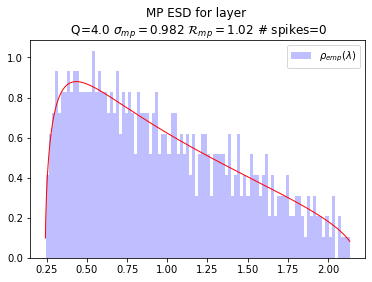

(0,
 0.9824882812499995,
 1.0172521546303546,
 0.24132080569839454,
 2.1718872512855514,
 1.0)

<Figure size 432x288 with 0 Axes>

In [53]:
watcher.mp_fit(evals=0.6*ESD, N=2048, M=512, rf=1.0, layer_name="", 
               layer_id=0, plot=True, savefig=False, color='b', rescale=False, savefolder=None)

INFO:weightwatcher:

python      version 3.8.3 (default, Jul  2 2020, 16:21:59) 
[GCC 7.3.0]
numpy       version 1.18.5
tensforflow version 2.3.1
keras       version 2.4.0
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savefig': False, 'rescale': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'savefolder': None, 'min_evals': 0, 'max_evals': None, 'plot': True, 'mp_fit': True, 'layers': []}
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savefig': False, 'rescale': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'savefolder': None, 'min_evals': 0, 'max_evals': None, 'plot': True, 'mp_fit': True, 'layers': []}
INFO:weightwatcher:LAYER: 1 4  : <class 'torch.nn.modules.linear.Linear'>
/home/eecs/yyaoqing/anaconda3/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning:

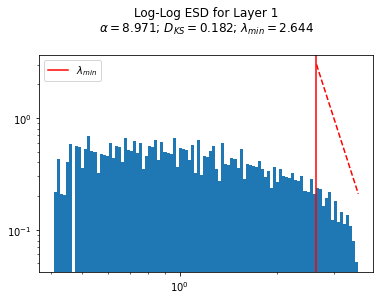

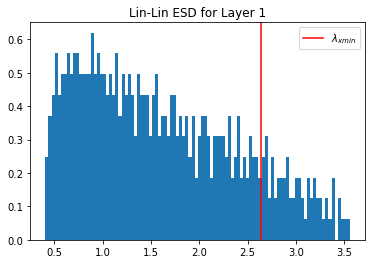

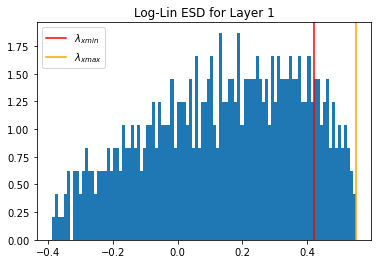

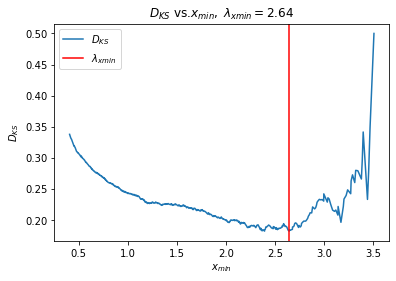

INFO:weightwatcher:MP Fitting Layer: 1 None 
INFO:weightwatcher:MP fit min_esd=0.41, max_esd=3.56, Q=4.0, s1=1.00 Wsc ale=1.00
/scratch/yyaoqing/WeightWatcher/weightwatcher/RMT_Util.py:82: RuntimeWarning: divide by zero encountered in true_divide
  return x, (1 / (2 * np.pi * sigma * sigma * x * y)) * np.sqrt((b - x) * (x - a))
/scratch/yyaoqing/WeightWatcher/weightwatcher/RMT_Util.py:82: RuntimeWarning: invalid value encountered in sqrt
  return x, (1 / (2 * np.pi * sigma * sigma * x * y)) * np.sqrt((b - x) * (x - a))


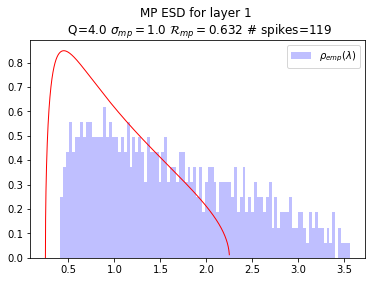

,layer_id,name,D,M,N,W_scale,alpha,alpha_weighted,best_fit,bulk_max,...,num_spikes,rank_loss,rf,sigma,sigma_mp,spectral_norm,stable_rank,sv_max,xmax,xmin
0,1,None,0.18191,512.0,2048.0,1.0,8.971497,4.945604,lognormal,2.25,...,119.0,0.0,1.0,0.966686,1.0,3.558422,229.85285,1.886378,3.558422,2.643919


<Figure size 432x288 with 0 Axes>

In [17]:
#linear_layer.load_state_dict(torch.load('linear_layer.ckpt'))
watcher = ww.WeightWatcher(model=linear_layer)
watcher.analyze(mp_fit=True, plot=True, rescale=False)